## Contract analysis


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
df_contract = pd.read_csv("../csv_outputs/master_contract.csv")

In [9]:
df_contract.head()

,token_address,chain,token_name,contract_name,verified,owner,creator,is_hidden_owner,is_proxy,is_sellable,...,total_snippets,mint_function_detected_number,ownership_renounced_number,is_honeypot_suspected_number,delayed_trading_detected_number,transfer_cooldown_detected_number,high_tax_detected_number,blacklist_or_whitelist_detected_number,trading_disabled_possible_number,other_suspicious_detected_number
0,0x002127Ec60f4b0F75F7AE20565D1d0cd99993dD3,bsc,ZTU COIN,Token,True,0x243ea50618725ac5d085f99b9c105a1de20d852f,0x243ea50618725ac5d085f99b9c105a1de20d852f,False,NaN,False,...,3,1,1,0,0,0,0,1,0,0
1,0x002A029d13f423227A24641CD5Fec448A52FEa32,bsc,Yarakat,Token,True,0xb0aefc5c435b91ece2be96d119eb1e314b6b390e,0xb0aefc5c435b91ece2be96d119eb1e314b6b390e,False,NaN,True,...,16,1,1,0,0,0,13,1,0,0
2,0x0079C34BaDa93B2ff613913Cde64E53aE6168fBa,bsc,Ninja Shiba,NINJASHIBA,True,0xc05df9a81e07a2bae4c2c38a8f1f7fb42bbd6c3a,0xc05df9a81e07a2bae4c2c38a8f1f7fb42bbd6c3a,False,NaN,True,...,53,5,2,3,1,0,39,2,1,0
3,0x007C5Ade505C1455a072207b0C5b9CF3Ac79B251,bsc,Battle Saga,BTL,True,0xa6302163a73fe862c4aa827591fd0ae270ab7fe1,0xa6302163a73fe862c4aa827591fd0ae270ab7fe1,False,NaN,True,...,7,2,1,1,0,0,3,0,0,0
4,0x008B19CF90896BB20c4619c59Ef4c2bC55B7674e,bsc,YTOFU,SpecialToken,True,0x6f3db2b9a5d18ab462cb3537147f39e82ceaf099,0x6f3db2b9a5d18ab462cb3537147f39e82ceaf099,False,NaN,True,...,0,0,0,0,0,0,0,0,0,0


## How many contracts are verified? Have a hidden owner? proxy? sellable? Have a hardcoded owner? have public source code? abi? 

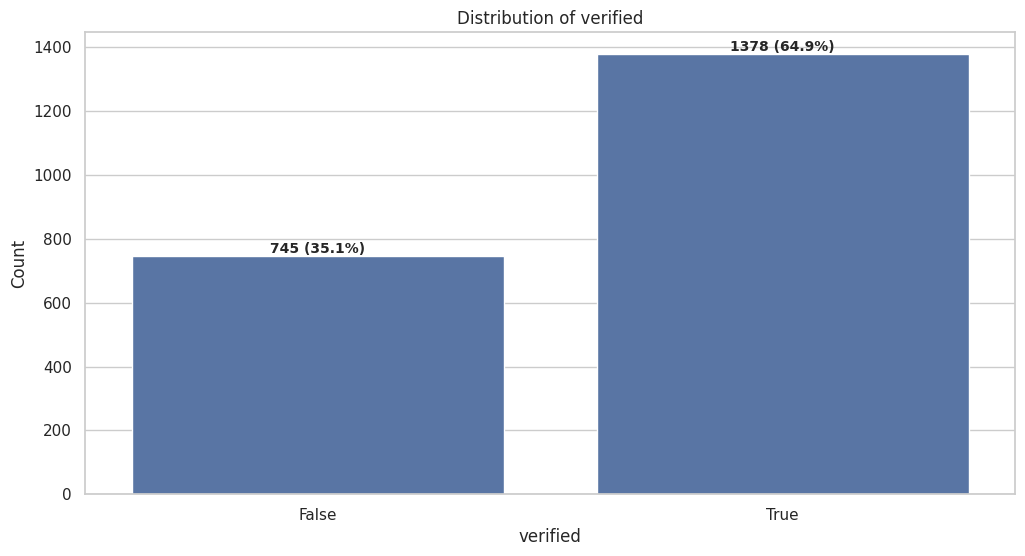

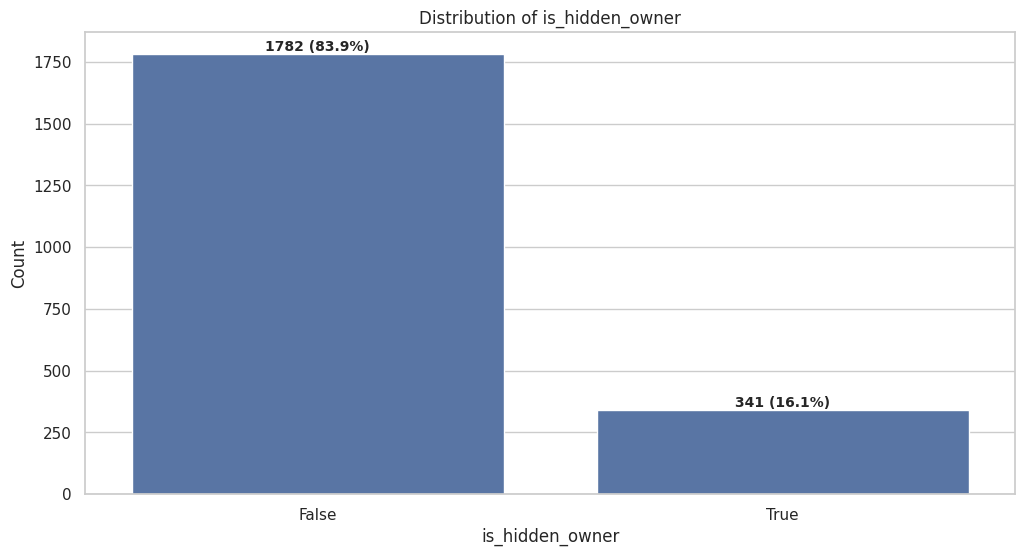

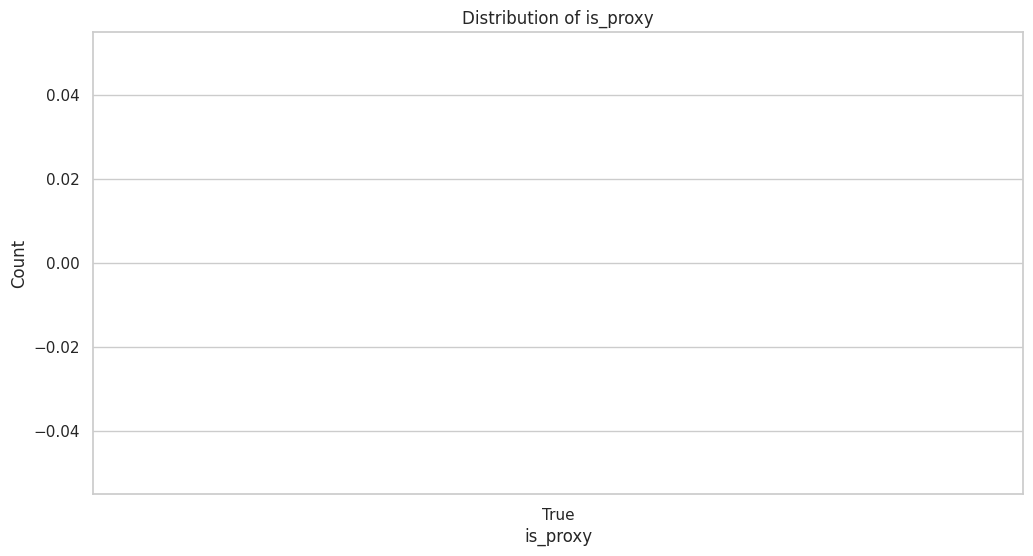

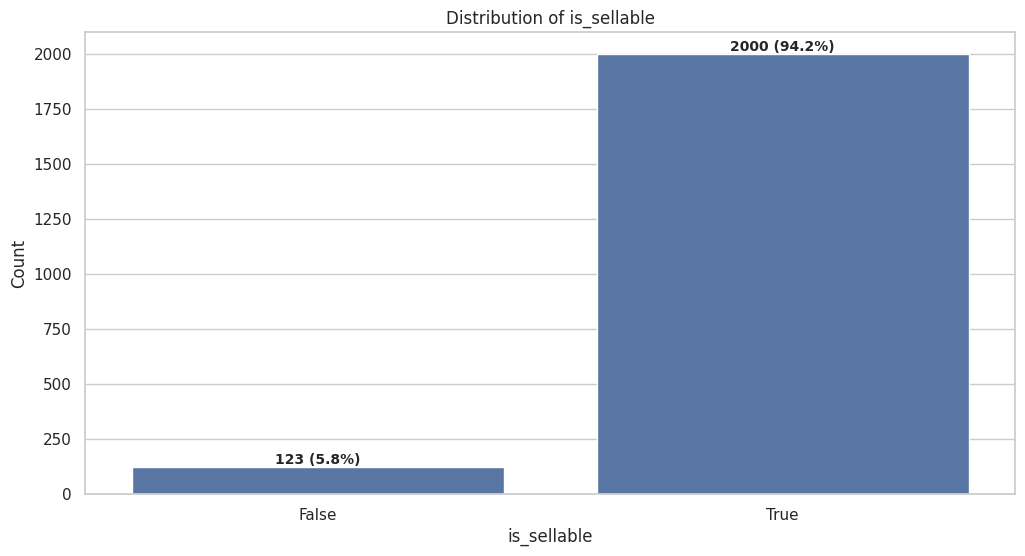

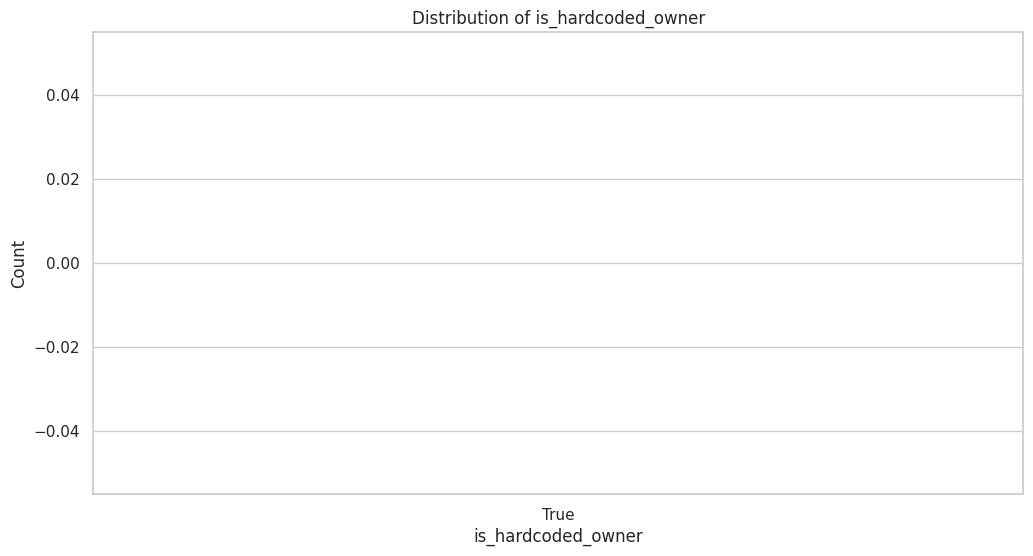

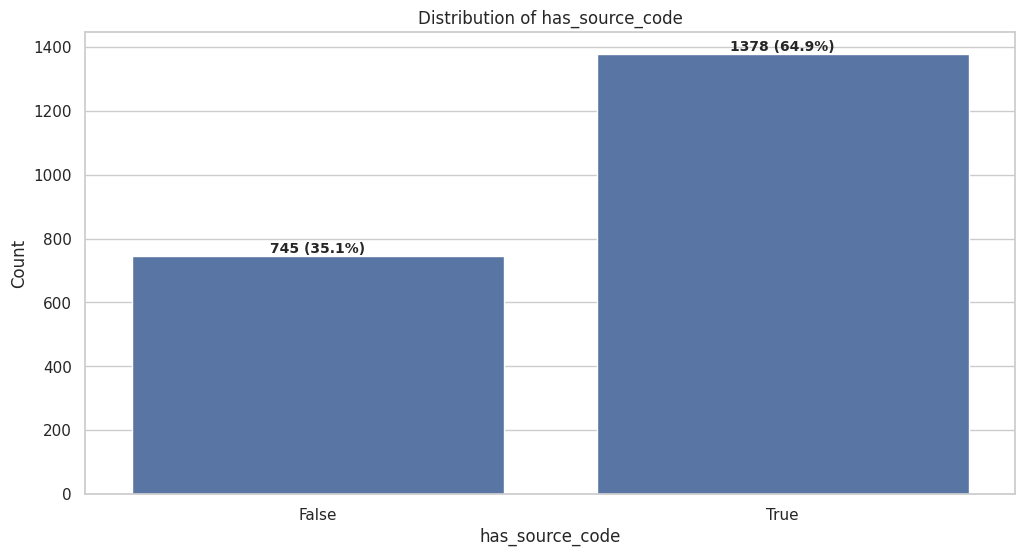

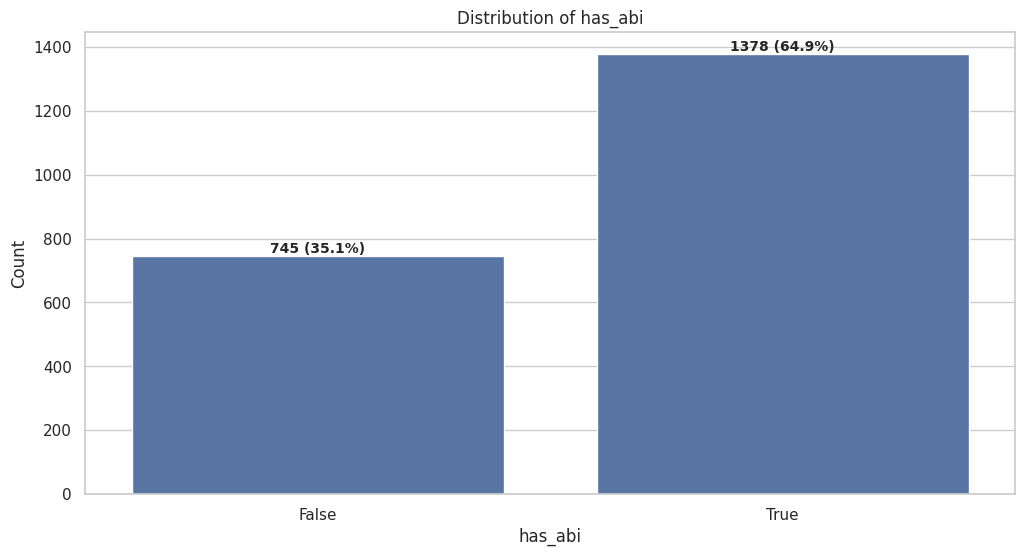

In [7]:
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)



# Convert boolean-like columns (if they're strings like 'True'/'False') to actual bools
bool_cols = ['verified', 'is_hidden_owner', 'is_proxy', 'is_sellable',
             'is_hardcoded_owner', 'has_source_code', 'has_abi']

for col in bool_cols:
    if df_contract[col].dtype == object:
        df_contract[col] = df_contract[col].map({'True': True, 'False': False})

# Plot boolean column distributions
for col in bool_cols:
    # Count values
    counts = df_contract[col].value_counts().sort_index()
    total = counts.sum()
    percentages = counts / total * 100

    # Plot
    ax = sns.countplot(data=df, x=col, order=[False, True] if False in counts.index else [True])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

    # Add annotations for count and percentage
    for i, p in enumerate(ax.patches):
        count = counts.iloc[i]
        percent = percentages.iloc[i]
        ax.annotate(f'{count} ({percent:.1f}%)',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom',
                    fontsize=10, fontweight='bold')

    plt.show()

## Snippets analysis

/tmp/ipykernel_63556/2366899803.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = f"{height:.2f} ({percentages[i]:.1f}%)"


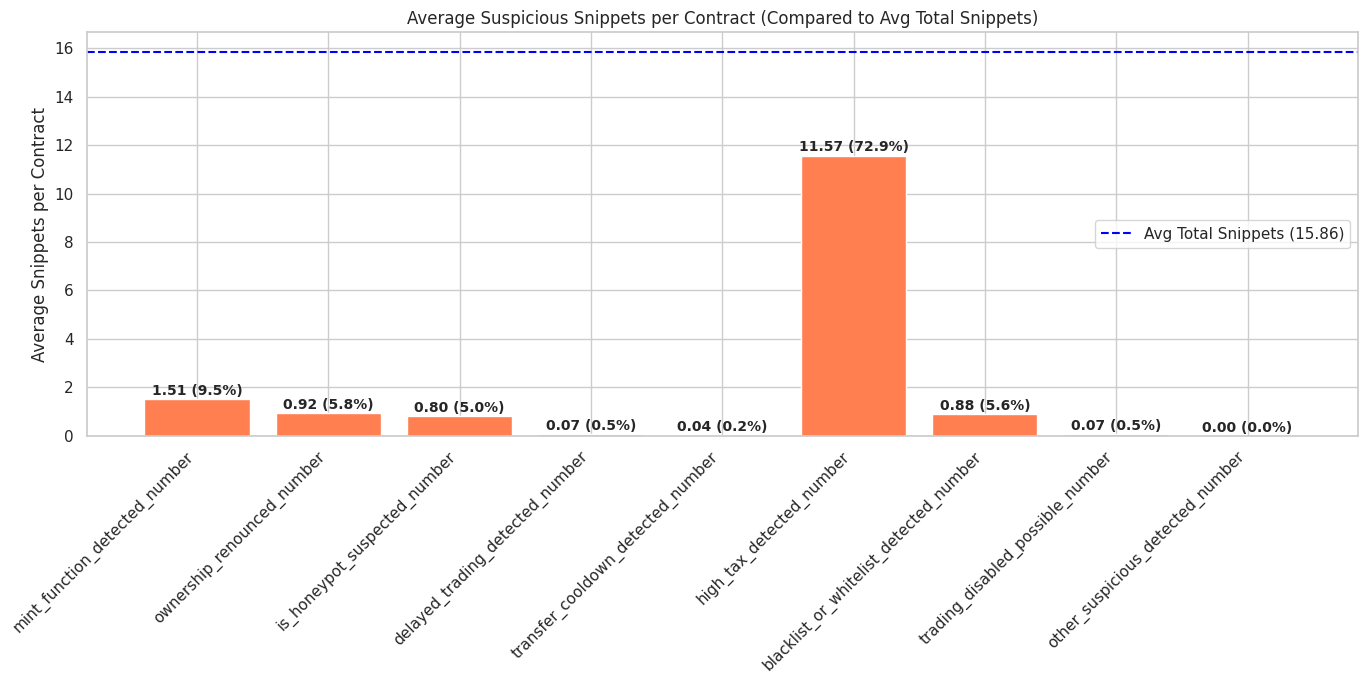

In [8]:
suspicious_cols = [
    'mint_function_detected_number',
    'ownership_renounced_number',
    'is_honeypot_suspected_number',
    'delayed_trading_detected_number',
    'transfer_cooldown_detected_number',
    'high_tax_detected_number',
    'blacklist_or_whitelist_detected_number',
    'trading_disabled_possible_number',
    'other_suspicious_detected_number'
]

# Get the average per contract
avg_total_snippets = df_contract['total_snippets'].mean()
avg_suspicious = df_contract[suspicious_cols].mean()

# Calculate percentages relative to average total_snippets
percentages = (avg_suspicious / avg_total_snippets) * 100

# Plot
plt.figure(figsize=(14, 7))
bars = plt.bar(avg_suspicious.index, avg_suspicious.values, color='coral')

# Add labels with average count and percentage
for i, bar in enumerate(bars):
    height = bar.get_height()
    label = f"{height:.2f} ({percentages[i]:.1f}%)"
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.05,
             label, ha='center', va='bottom', fontsize=10, fontweight='bold')

# Draw a horizontal line for average total snippets
plt.axhline(avg_total_snippets, color='blue', linestyle='--', label=f'Avg Total Snippets ({avg_total_snippets:.2f})')

plt.title('Average Suspicious Snippets per Contract (Compared to Avg Total Snippets)')
plt.ylabel('Average Snippets per Contract')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

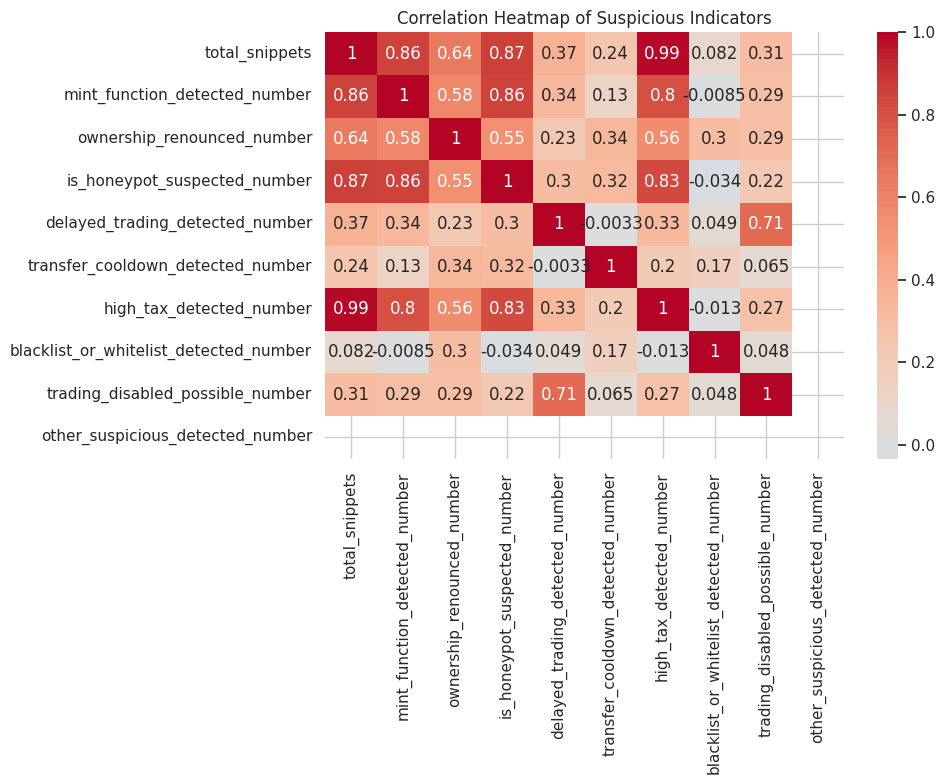

In [12]:

# Select relevant numeric columns
suspicious_cols = [
    "total_snippets",
    "mint_function_detected_number",
    "ownership_renounced_number",
    "is_honeypot_suspected_number",
    "delayed_trading_detected_number",
    "transfer_cooldown_detected_number",
    "high_tax_detected_number",
    "blacklist_or_whitelist_detected_number",
    "trading_disabled_possible_number",
    "other_suspicious_detected_number"
]

df_numeric = df_contract[suspicious_cols]

# Calculate correlation matrix
corr = df_numeric.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Suspicious Indicators")
plt.tight_layout()
plt.show()